In [100]:
%cd '/app'

/app


In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
from sage.all import *
import sys
sys.path.append('src')

from time import time

import numpy as np
from src.border_basis_lib.border_basis_sampling import BorderBasisGenerator
from src.border_basis_lib.plot import plot_order_ideals, plot_order_ideal
from src.border_basis_lib.utils import is_order_ideal

In [104]:
def demo_sampling(degree_bounds = [5, 5], num_plots=8, filename=None):
    n = len(degree_bounds)
    ring = PolynomialRing(QQ, ['x', 'y', 'z'][:n], order='degrevlex')
    generator = BorderBasisGenerator(ring)

    Os = []
    for i in range(num_plots):
        print(f'Sampling order ideal {i+1}/{num_plots}...', end='\r', flush=True)
        # O = generator.random_order_ideal(degree_bounds)
        O = generator.sample_order_ideal(degree_bounds)

        assert(is_order_ideal([ring.monomial(*o) for o in O]))
        Os.append(O)
        
    plot_order_ideals(degree_bounds, Os, filename=filename)

def demo_order_ideal_evolution(degree_bounds = [5, 5], filename=None):
    n = len(degree_bounds)
    ring = PolynomialRing(QQ, ['x', 'y', 'z'][:n], order='degrevlex')
    generator = BorderBasisGenerator(ring)

    O, Os = generator.sample_order_ideal(degree_bounds, track_changes=True)
    # plot_order_ideal(degree_bounds, O)
    print("", flush=True)
    plot_order_ideals(degree_bounds, Os, track_changes=True, filename=filename)

def demo_border_basis_sampling(degree_bounds = [5, 5], degree_lower_bounds=None, num_samples=100):
    
    successes = []
    runtimes = []
    retries = []
    for i in range(num_samples):
        print(f'Sampling border basis {i+1}/{num_samples}...', end='\r', flush=True)
        ss = time()
        n = len(degree_bounds)
        ring = PolynomialRing(GF(997), 'x', n, order='degrevlex')
        generator = BorderBasisGenerator(ring)
        
        s = time()
        ret = generator.random_border_basis(degree_bounds, degree_lower_bounds=degree_lower_bounds)
        t = time() - s
        runtimes.append(t)
        successes.append(ret['success'])
        
        retries.append(ret['sampling_retrials'])
        
        # print('time = ', s - ss, t, time() - ss)
        
    print(f'Stats (degree_bounds={degree_bounds}):')
    print('----------------')
    print(f'Success rate: {np.mean(successes):.2f} ({np.sum(successes)}/{num_samples})')
    print(f'Average runtime: {np.mean(runtimes):.5f} sec')
    print(f'Average retries: {np.mean(retries):.2f}')
    
    return {'successes': successes, 'runtimes': runtimes, 'retries': retries}


In [105]:
# demo_border_basis_sampling(degree_bounds = [10, 10, 10], degree_lower_bounds=[2, 2, 2], num_samples=100)
demo_border_basis_sampling(degree_bounds = [10, 10, 10], num_samples=100)

Stats (degree_bounds=[10, 10, 10]):
----------------
Success rate: 1.00 (100/100)
Average runtime: 0.13164 sec
Average retries: 0.00


{'successes': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'runtimes': [0.03291440010070801,
  0.0826578140258789,
  0.005921602249145508,
  0.02772665023803711,
  0.041387319564819336,
  0.14263153076171875,
  0.04775595664978027,
  0.00668764

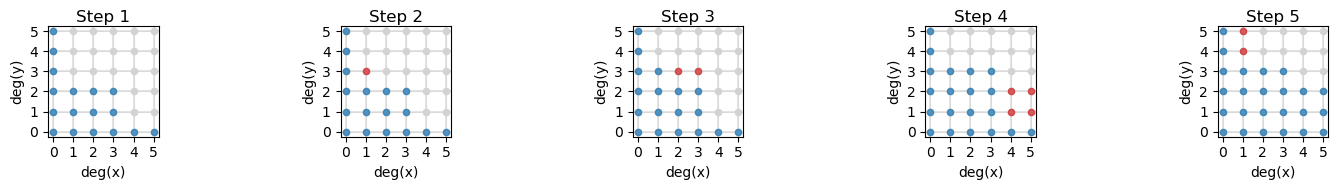

In [148]:
# seed = 5
# set_random_seed(seed)
# np.random.seed(seed)

# filename = './figs/order_ideal_evolution.pdf'
filename = ''
demo_order_ideal_evolution(degree_bounds = [5, 5], filename=filename)

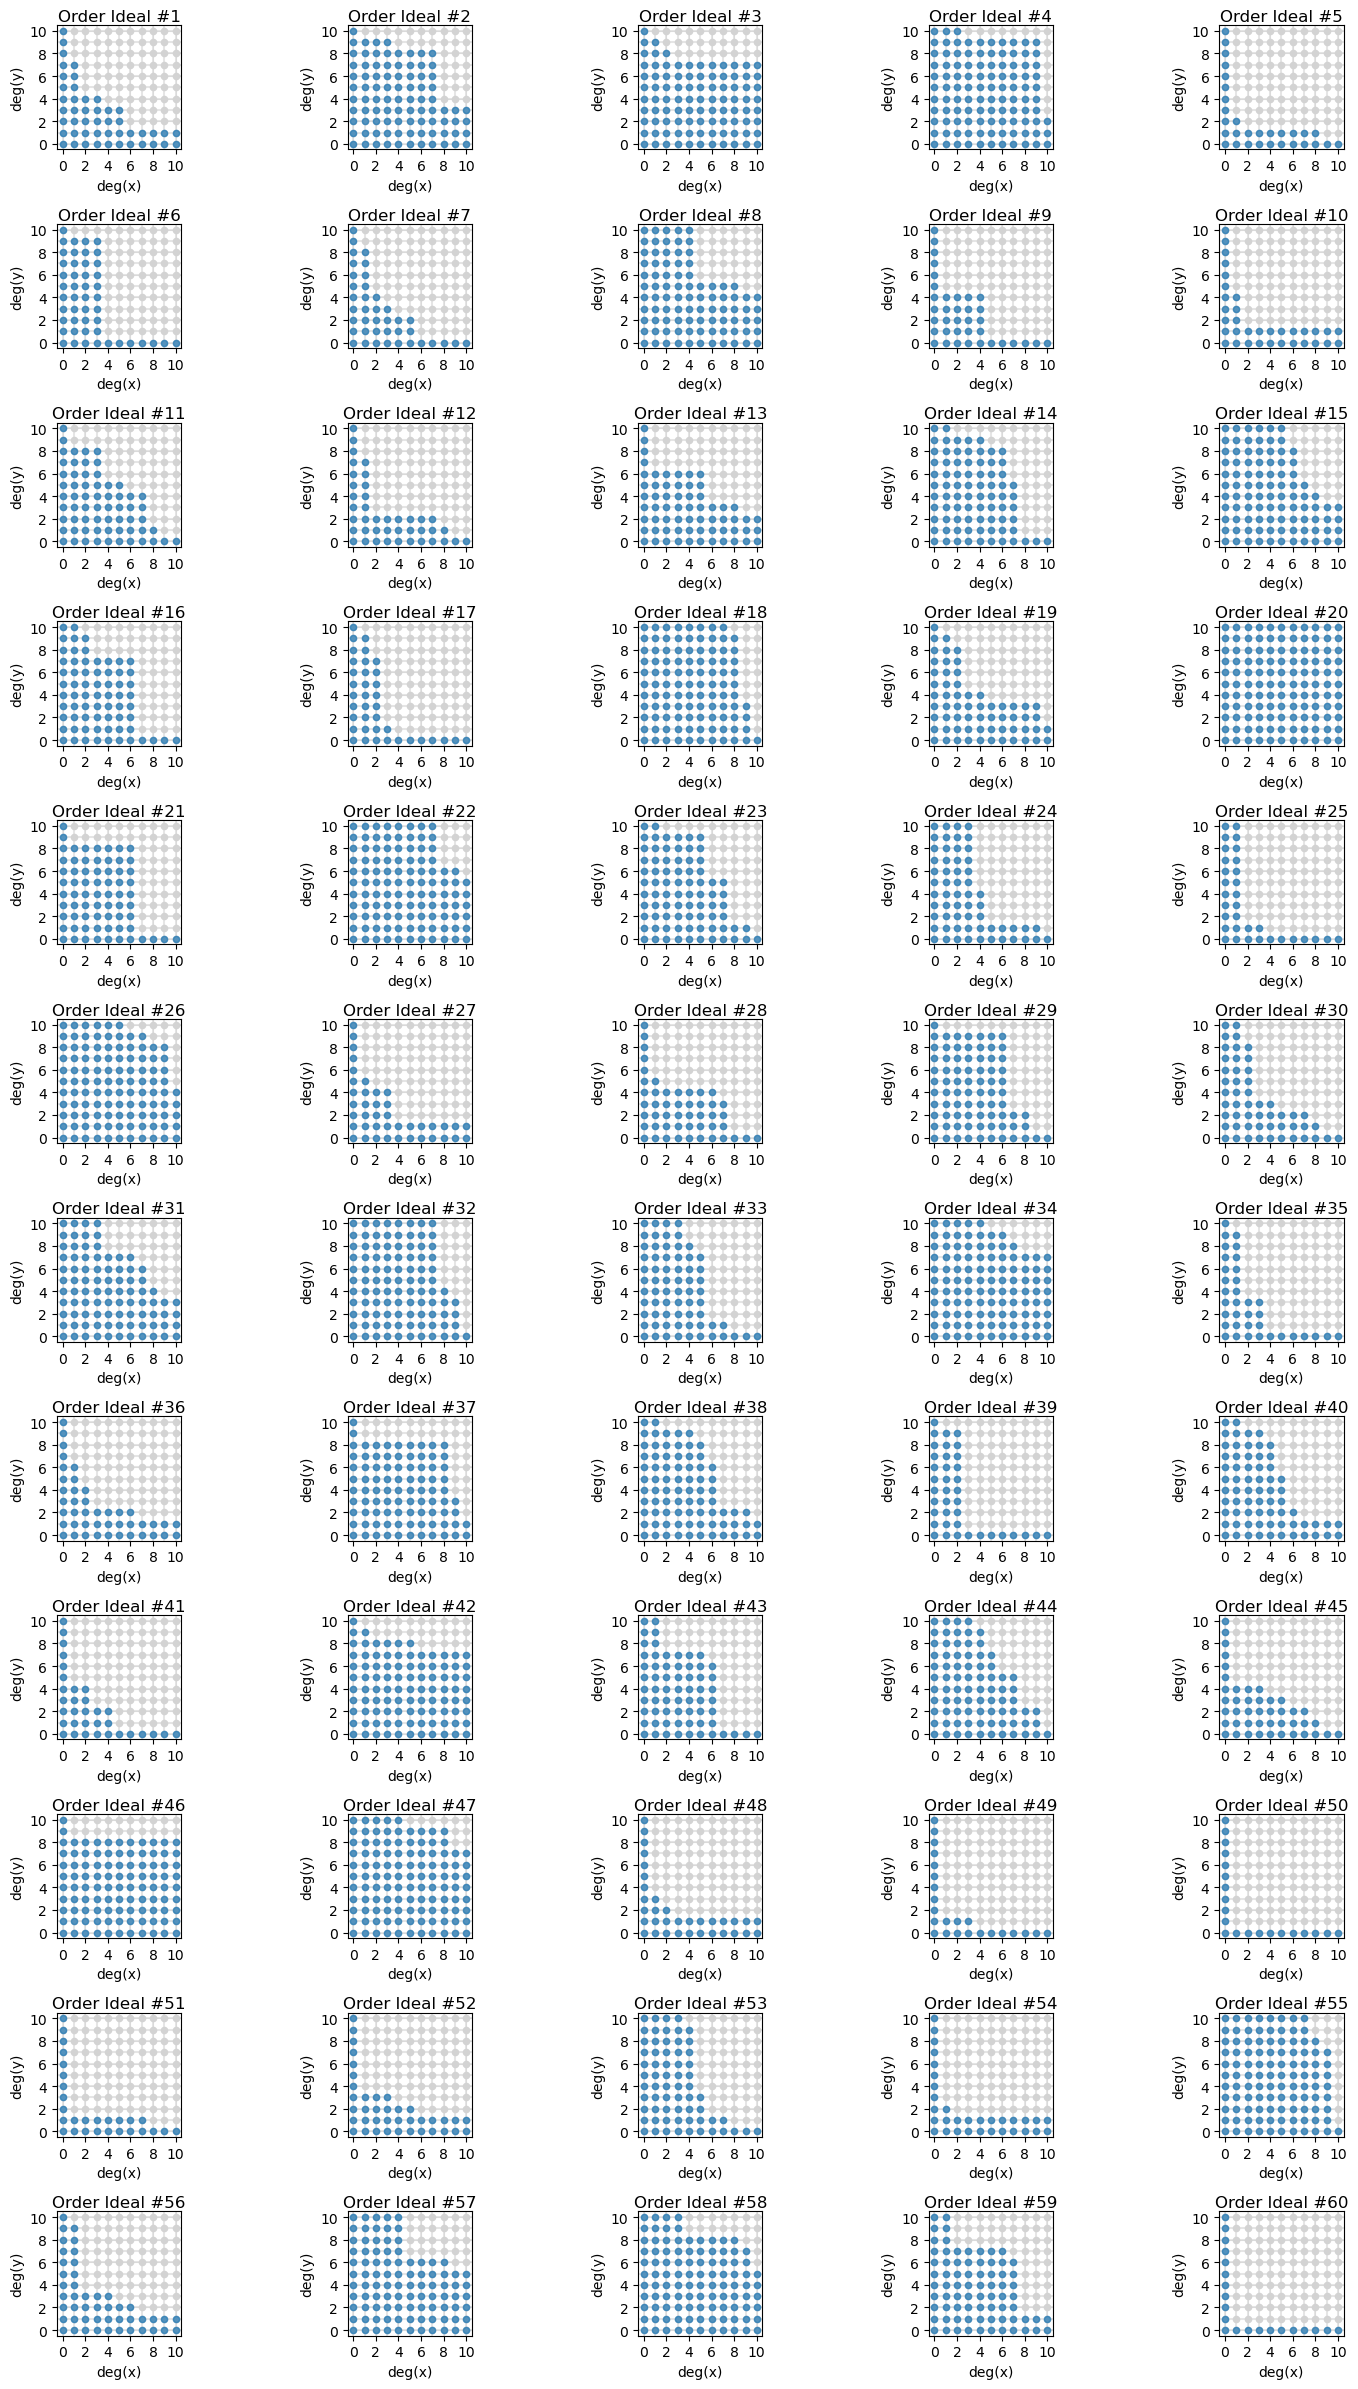

In [151]:
filename = './figs/order_ideal_gallary.pdf'
# filename = ''
demo_sampling(degree_bounds = [10, 10], num_plots=60, filename=filename)

Failed to find a order ideal after 100 iterations.


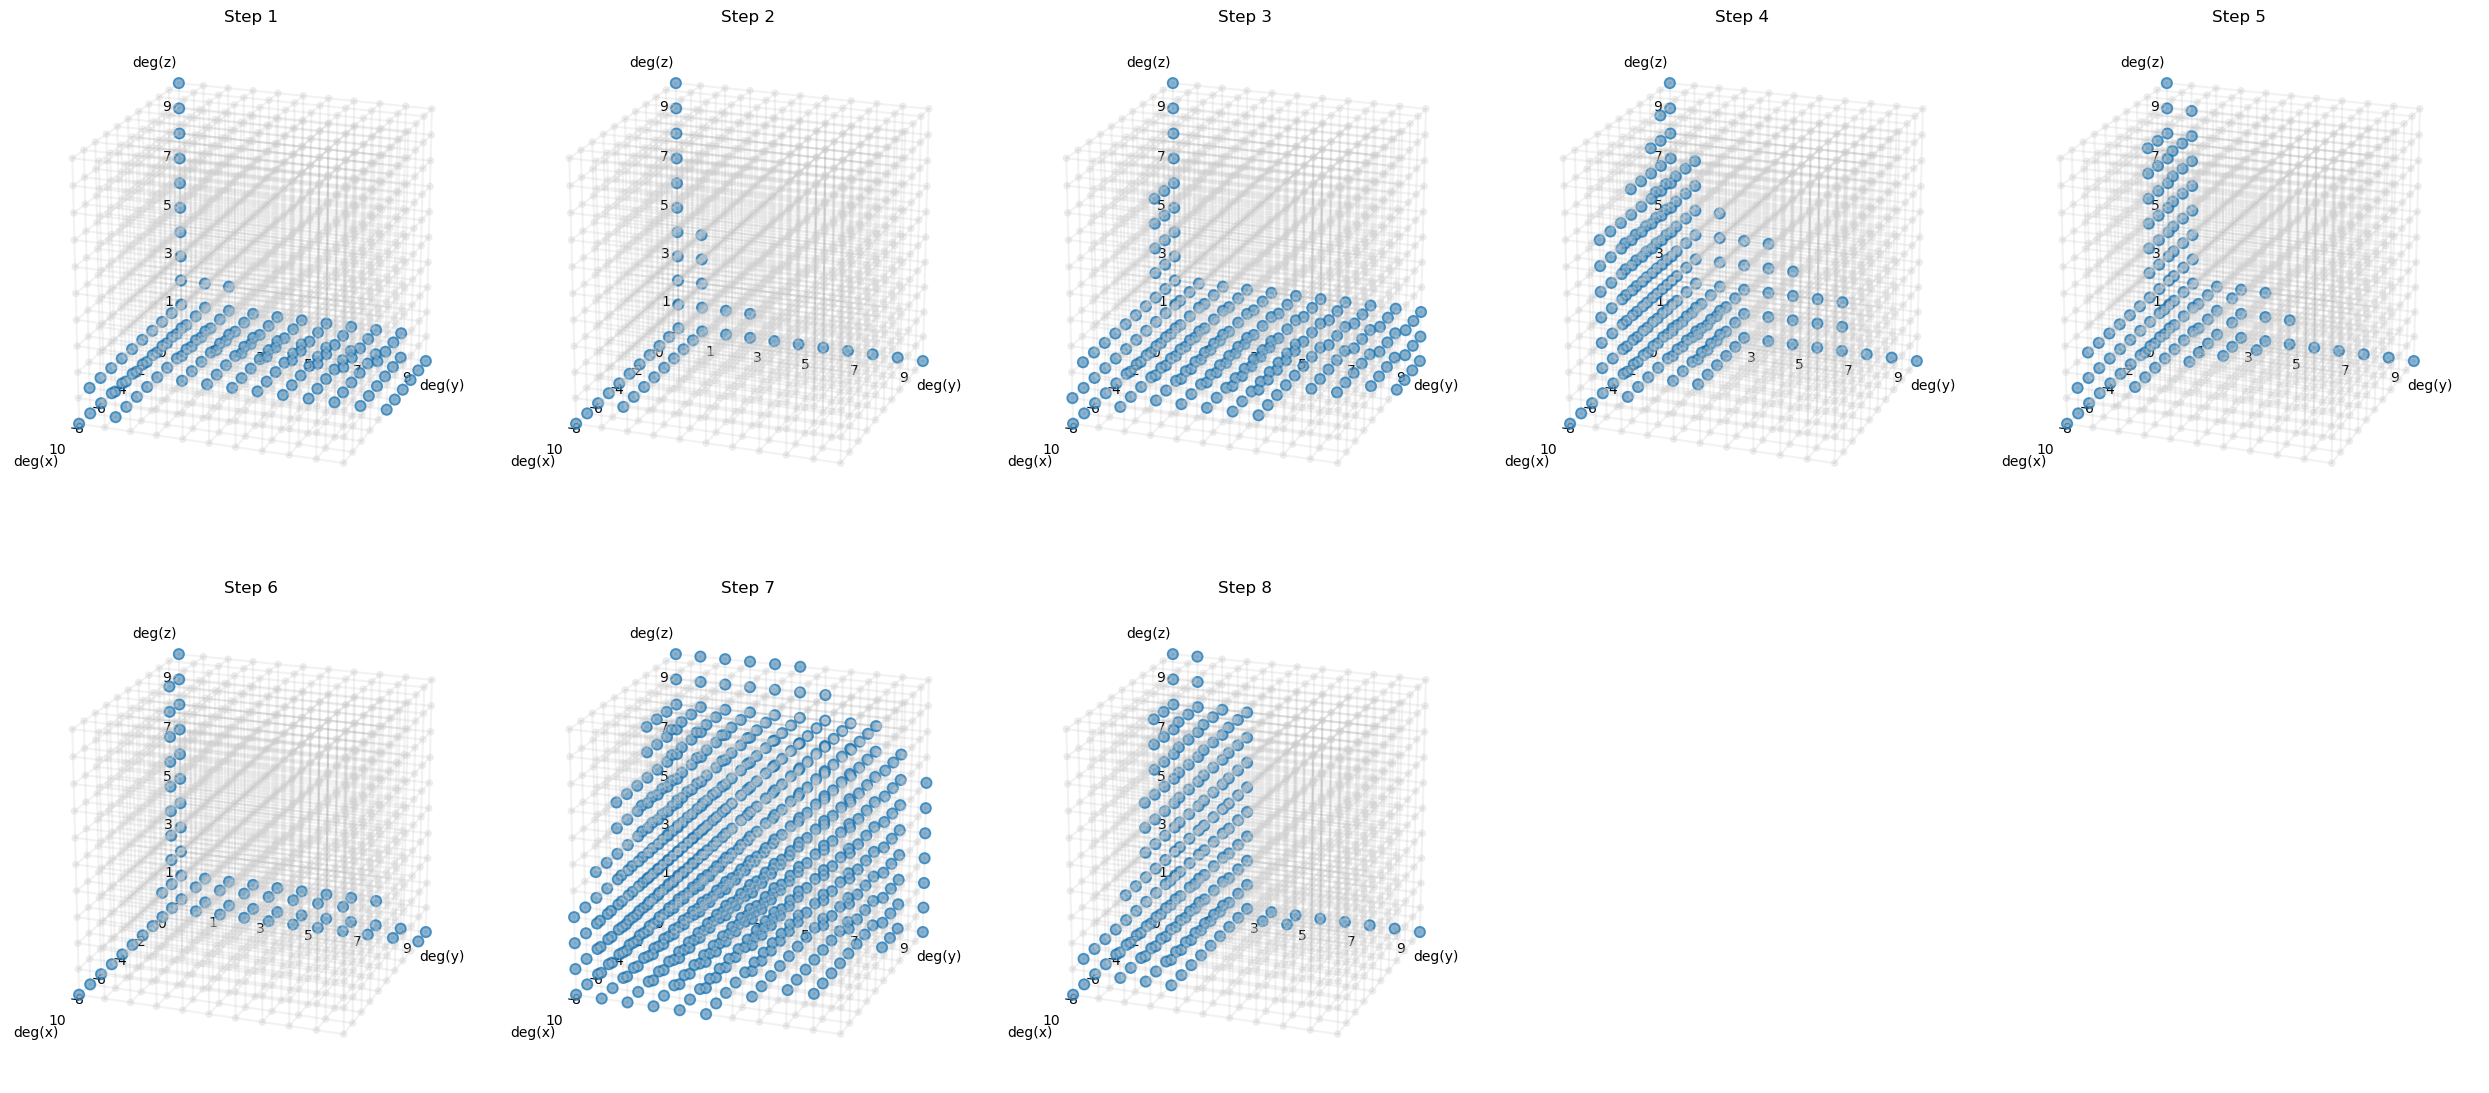

In [158]:
demo_sampling(degree_bounds = [10, 10, 10], num_plots=8)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Any, Optional
from dataclasses import dataclass

@dataclass
class ExperimentResult:
    """Container for experiment statistics"""
    mean: float
    std: float

class BorderBasisExperiment:
    def __init__(self):
        self.results = {}
    
    def run_dimension_experiment(self, 
                               dimensions: List[int], 
                               base_degree: int = 10,
                               num_samples: int = 100) -> Dict[str, Dict[int, ExperimentResult]]:
        """
        Run experiments with varying dimensions
        
        Parameters:
        -----------
        dimensions : List[int]
            List of dimensions to test
        base_degree : int
            Degree bound to use for all dimensions
        num_samples : int
            Number of samples per experiment
        """
        results = {'successes': {}, 'runtimes': {}, 'retries': {}}
        
        for dim in dimensions:
            degree_bounds = [base_degree] * dim
            degree_lower_bounds = [0] * dim
            
            # Run experiment
            result = demo_border_basis_sampling(
                degree_bounds=degree_bounds,
                # degree_lower_bounds=degree_lower_bounds,
                num_samples=num_samples
            )
            
            # Calculate statistics
            for key in ['successes', 'runtimes', 'retries']:
                mean = np.mean(result[key])
                std = np.std(result[key])
                results[key][dim] = ExperimentResult(mean, std)
        
        return results
    
    def run_degree_experiment(self, 
                            degrees: List[int], 
                            dim: int = 2,
                            num_samples: int = 100) -> Dict[str, Dict[int, ExperimentResult]]:
        """
        Run experiments with varying degrees
        
        Parameters:
        -----------
        degrees : List[int]
            List of degrees to test
        dim : int
            Number of dimensions to use
        num_samples : int
            Number of samples per experiment
        """
        results = {'successes': {}, 'runtimes': {}, 'retries': {}}
        
        for deg in degrees:
            degree_bounds = [deg] * dim
            degree_lower_bounds = [0] * dim
            
            # Run experiment
            result = demo_border_basis_sampling(
                degree_bounds=degree_bounds,
                degree_lower_bounds=degree_lower_bounds,
                num_samples=num_samples
            )
            
            # Calculate statistics
            print(result)
            for key in ['successes', 'runtimes', 'retries']:
                mean = np.mean(result[key])
                std = np.std(result[key])
                results[key][deg] = ExperimentResult(mean, std)
        
        return results

    def plot_results(self, 
                    results: Dict[str, Dict[int, ExperimentResult]], 
                    xlabel: str,
                    title_prefix: str = "",
                    filename: Optional[str] = None):
        """
        Plot experiment results with improved visibility
        
        Parameters:
        -----------
        results : Dict[str, Dict[int, ExperimentResult]]
            Experimental results to plot
        xlabel : str
            Label for x-axis
        title_prefix : str
            Prefix for plot titles
        filename : Optional[str]
            If provided, save plot to this file
        """
        # plt.style.use('seaborn')  # Use seaborn style for better default looks
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        metrics = ['successes', 'runtimes', 'retries']
        titles = ['Success Rate', 'Runtime (s/sample)', 'Number of Retries (/sample)']
        
        for ax, metric, title in zip(axes, metrics, titles):
            x = sorted(results[metric].keys())
            means = [results[metric][k].mean for k in x]
            stds = [results[metric][k].std for k in x]
            
            # Plot with thicker line and markers
            ax.errorbar(x, means, yerr=stds, 
                    fmt='o-',              # Line with markers
                    capsize=5,             # Error bar cap size
                    linewidth=2.5,         # Thicker line
                    markersize=8,          # Larger markers
                    capthick=1,            # Error bar cap thickness
                    elinewidth=1,          # Error bar line width
                    color='steelblue')     # Professional color
            
            # Increase font sizes
            ax.set_xlabel(xlabel, fontsize=14, fontweight='bold')
            ax.set_ylabel(title, fontsize=14, fontweight='bold')
            ax.set_title(f"{title_prefix}{title}", 
                        fontsize=16, 
                        fontweight='bold', 
                        pad=15)
            
            # Improve grid appearance
            ax.grid(True, alpha=0.3, linestyle='--')
            
            # Increase tick label sizes
            ax.tick_params(axis='both', which='major', labelsize=12)
            
            # Add light background color to improve readability
            ax.set_facecolor('#f8f9fa')
            
            # Add buffer to axis limits for better spacing
            y_min, y_max = ax.get_ylim()
            buffer = (y_max - y_min) * 0.1
            ax.set_ylim(y_min - buffer, y_max + buffer)
        
        # Adjust layout
        plt.tight_layout(pad=2.0)
        
        # Save figure if filename is provided
        if filename:
            plt.savefig(filename, 
                    dpi=300,              # High resolution
                    bbox_inches='tight',   # Include all elements
                    facecolor='white')     # White background
        
        plt.show()

def run_all_experiments(save_plots: bool = False):
    """
    Run and plot all experiments
    
    Parameters:
    -----------
    save_plots : bool
        If True, save plots to files
    """
    experiment = BorderBasisExperiment()
    
    # Varying degree experiment
    degrees = [5, 10, 15, 20]
    degree_results = experiment.run_degree_experiment(degrees)
    experiment.plot_results(
        degree_results, 
        xlabel="Degree Bound",
        # title_prefix="Effect of Degree Bound: ",
        filename="figs/border_basis_samlping_degree_experiment.pdf" if save_plots else None
    )
    
    # Varying dimension experiment
    dimensions = [2, 3, 4]
    dimension_results = experiment.run_dimension_experiment(dimensions)
    experiment.plot_results(
        dimension_results, 
        xlabel="Number of Variables",
        # title_prefix="Effect of Dimension: ",
        filename="figs/border_basis_samlping_dimension_experiment.pdf" if save_plots else None
    )

Stats (degree_bounds=[5, 5]):
----------------
Success rate: 1.00 (100/100)
Average runtime: 0.00196 sec
Average retries: 0.00
{'successes': [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], 'runtimes': [0.004049777984619141, 0.0015439987182617188, 0.0009577274322509766, 0.0017108917236328125, 0.0027849674224853516, 0.0039005279541015625, 0.0017023086547851562, 0.003278970718383789, 0.002328634262084961, 0.0014395713806152344, 0.001426458358764

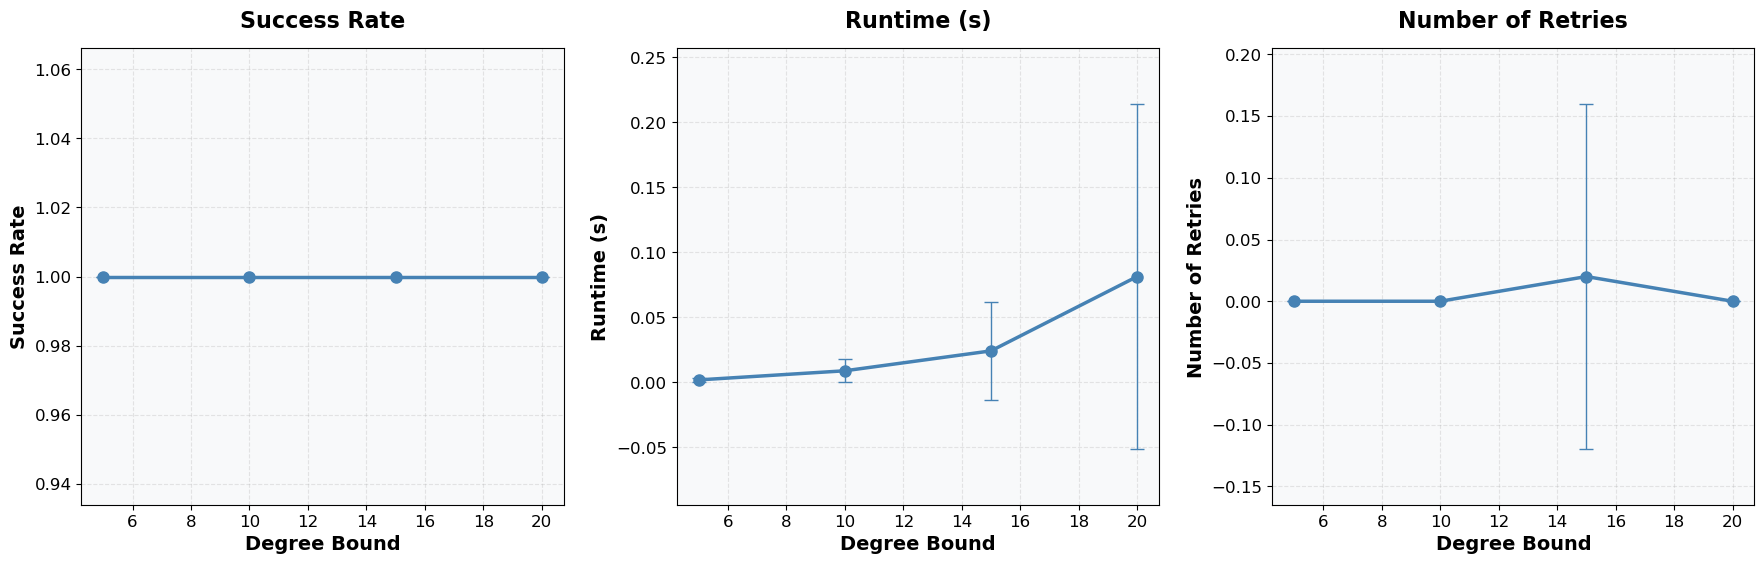

Stats (degree_bounds=[10, 10]):
----------------
Success rate: 1.00 (100/100)
Average runtime: 0.00944 sec
Average retries: 0.01
Stats (degree_bounds=[10, 10, 10]):
----------------
Success rate: 1.00 (100/100)
Average runtime: 0.15204 sec
Average retries: 0.00
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out after 100 iterations.
In sample_order_ideal: Loop out afte

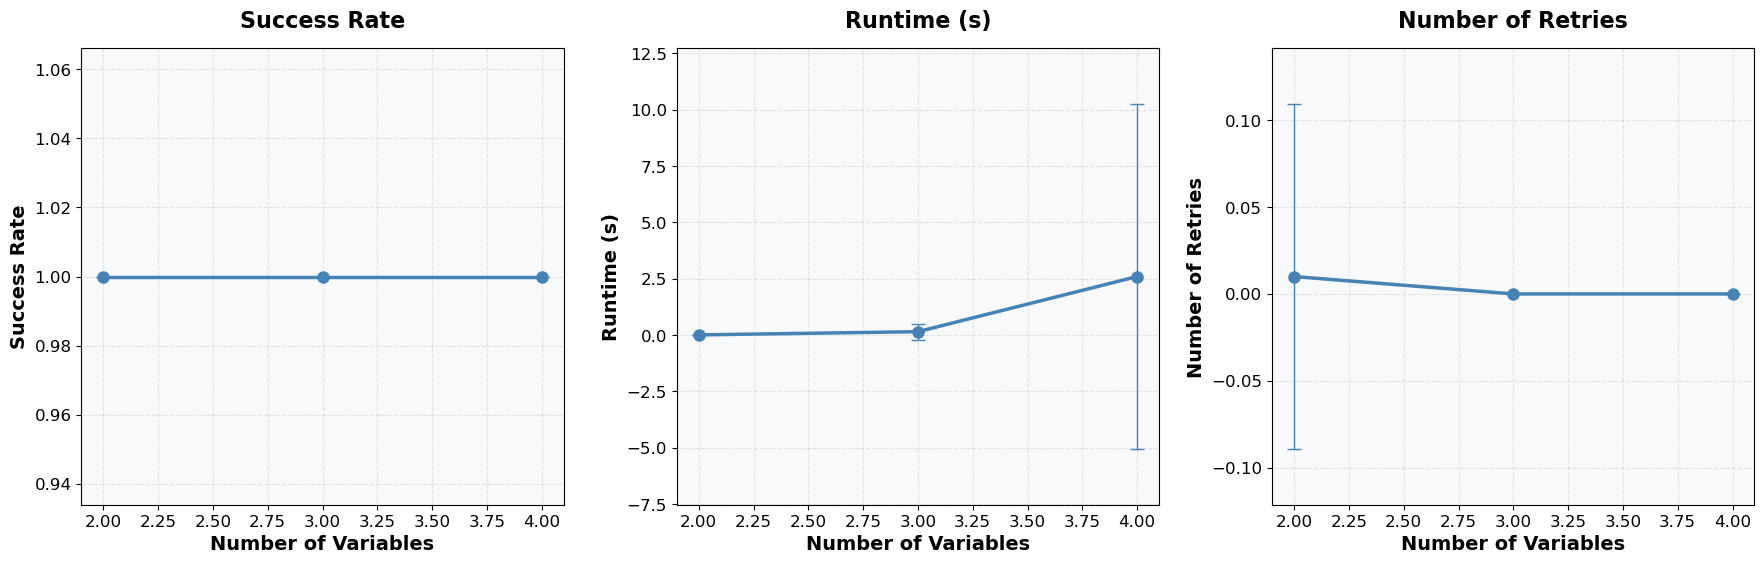

In [171]:
run_all_experiments(save_plots=True)

In [106]:
degree_bounds = [4, 4]
degree_lower_bounds = [0, 0]

n = len(degree_bounds)
ring = PolynomialRing(GF(997), 'x', n, order='degrevlex')
generator = BorderBasisGenerator(ring)

ret = generator.random_border_basis(degree_bounds, degree_lower_bounds=degree_lower_bounds)


In [110]:
O = ret['order']
G = ret['basis']
B = ret['border']

In [112]:
O

[x0^3, x0*x1^2, x1^3, x0^2, x0*x1, x1^2, x0, x1, 1]

In [113]:
G

[x0^4 + 98*x0^3 - 29*x0*x1^2 + 202*x1^3 - 51*x0^2 + 222*x0*x1 + 20*x1^2 - 217*x0 - 424*x1 + 330,
 x0^3*x1 + 297*x0^3 + 240*x0*x1^2 + 487*x1^3 - 223*x0^2 + 131*x0*x1 - 201*x1^2 + 231*x0 - 45*x1 + 291,
 x0^2*x1^2 - 482*x0^3 - 431*x0*x1^2 - 233*x1^3 - 247*x0^2 + 88*x0*x1 + 225*x1^2 + 161*x0 + 484*x1 + 141,
 x0*x1^3 - 253*x0^3 - 182*x0*x1^2 + 461*x1^3 + 56*x0^2 - 237*x0*x1 + 158*x1^2 - 275*x0 + 441*x1 - 152,
 x1^4 + 55*x0^3 + 158*x0*x1^2 - 227*x1^3 + 156*x0^2 + 61*x0*x1 + 302*x1^2 - 243*x0 + 178*x1 - 84,
 -42*x0^3 + x0^2*x1 - 375*x0*x1^2 + 428*x1^3 - 270*x0^2 + 147*x0*x1 - 258*x1^2 - 407*x0 + 464*x1 - 270]

In [109]:
ideal(G).groebner_basis()

[1]

In [22]:
G[0]

265*x0^8*x2 + 475*x0^8 - 245*x0^7*x2 - 211*x0^7 - 451*x0^6*x2 - 433*x0^6 - 61*x0^5*x2 - 108*x0^5 + 51*x0^4*x2 + 132*x1^3*x2^2 - 298*x0*x2^4 + 444*x1*x2^4 - 295*x2^5 + 345*x0^4 - 451*x0^3*x2 + 45*x1^3*x2 + 460*x0^2*x2^2 - 231*x0*x1*x2^2 - 379*x1^2*x2^2 + 3*x0*x2^3 - 464*x1*x2^3 - 99*x2^4 - 480*x0^3 - 472*x0^2*x1 + x0*x1^2 + 436*x1^3 + 258*x0^2*x2 + 288*x0*x1*x2 + 431*x1^2*x2 + 17*x0*x2^2 - 399*x1*x2^2 + 29*x2^3 - 232*x0^2 - 432*x0*x1 + 495*x1^2 - 74*x0*x2 + 465*x1*x2 - 339*x2^2 + 292*x0 - 138*x1 + 105*x2 + 153